In [68]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [69]:
particlesDict = {}

In [70]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [71]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [73]:
particlesDict[23]

{'id': 23,
 'name': 'Z0',
 'spinType': 3,
 'chargeType': 0,
 'colType': 0,
 'm0': 91.1876,
 'mWidth': 2.4952,
 'mMin': 10.0,
 'mMax': 0.0}

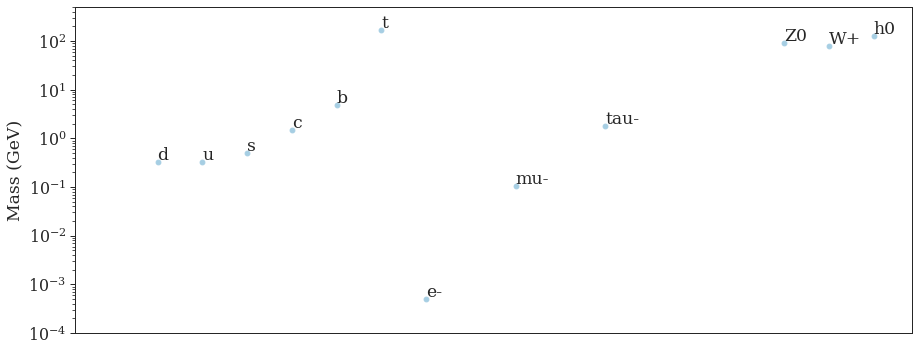

In [112]:
fig = plt.figure(figsize=(15,6))
massesSM = np.array([(p['name'],p['m0']) for pid,p in particlesDict.items() 
                     if (p['m0'] < 200 and pid < 30)],
                   dtype=[('name', 'U10'), ('mass', 'f4')])
plt.plot(massesSM['mass'],'o')
for i,pt in enumerate(massesSM):
    if pt['mass'] < 1e-4: continue #skip neutrinos
    plt.annotate(pt['name'],(i,1.1*pt['mass']))
plt.yscale('log')
plt.ylabel('Mass (GeV)')
plt.ylim(1e-4,500)
plt.xticks([])
plt.show()

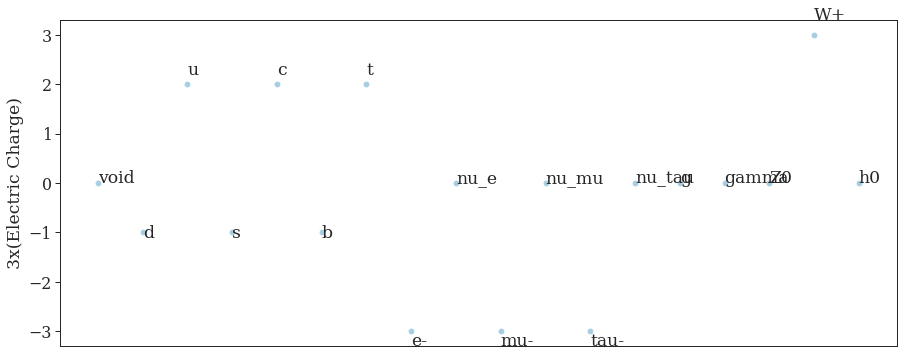

In [113]:
fig = plt.figure(figsize=(15,6))
chargesSM = np.array([(p['name'],p['chargeType']) for pid,p in particlesDict.items() 
                     if (p['m0'] < 200 and pid < 30)],
                   dtype=[('name', 'U10'), ('charge', 'i4')])
plt.plot(chargesSM['charge'],'o')
for i,pt in enumerate(chargesSM):
    plt.annotate(pt['name'],(i,1.1*pt['charge']))
# plt.yscale('log')
plt.ylabel('3x(Electric Charge)')
# plt.ylim(1e-4,500)
plt.xticks([])
plt.show()